In [193]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

## Import Mobility Data

In [194]:
# keep FIPS as string to preserve leading zeroes

In [195]:
combined = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/hia_covid_combined.csv", dtype={'County_FIPS': 'str'} )

In [196]:
combined['date'] = combined['date'].astype("datetime64")

In [197]:
combined_sub = combined.drop(columns=['Unnamed: 0','Date','locationcol','Country/Region'])

In [198]:
list(combined_sub.columns)

['date',
 'County_FIPS',
 'StateCD',
 'Name',
 'retail_and_recreation_PCT_CFB',
 'grocery_and_pharmacy_PCT_CFB',
 'parks_PCT_CFB',
 'transit_stations_PCT_CFB',
 'workplaces_PCT_CFB',
 'residential_PCT_CFB',
 'retail_and_recreation_PCT_CFB_RollingAvg',
 'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 'parks_PCT_CFB_RollingAvg',
 'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'HS_DIPLOMA_ONLY_2018',
 'SOME_COLLEGE_2018',
 'BACHELORS_PLUS_2018',
 'Poverty_PCT_2018',
 'UrbanCD',
 'Median_Income_2018',
 'Population_ACS',
 'Population_Black_ACS',
 'Population_Hisp_ACS',
 'Population_Native_ACS',
 'PCT_Black_ACS',
 'PCT_Hisp_ACS',
 'PCT_Native_ACS',
 'UrbanCD_Description',
 'Metro',
 'State',
 'Confirmed',
 'Deaths',
 'Deaths_Previous',
 'Confirmed_Previous',
 'Deaths_New',
 'Deaths_New_7',
 'Deaths_New_14',
 'Deaths_New_21',
 'Deaths_New_28',
 'Confirmed_New',
 'Confirmed_New_RollingAvg',
 'Deaths_New_RollingAvg',
 'Deaths_New_7_Rolli

## Examine per-county distributions

In [402]:
county = combined_sub.groupby(["Name","State","County_FIPS","Region","Division"])[combined_sub.columns].max()

In [390]:
county = combined_sub.groupby(["Name","State","County_FIPS","Region","Division"])[combined_sub.columns].max()
county = pd.DataFrame(county) #.reset_index(inplace=True)
county.reset_index(inplace=True)

In [391]:
county.reset_index(inplace=True)

In [202]:
county.retail_and_recreation_PCT_CFB_RollingAvg.describe()

count    2353.000000
mean       -8.328737
std        11.490205
min       -64.642857
25%       -13.760204
50%        -6.993651
75%        -1.342857
max        55.383777
Name: retail_and_recreation_PCT_CFB_RollingAvg, dtype: float64

In [122]:
county_samp = county.sample(frac=.1)

In [123]:
county.PCT_Hisp_ACS.describe()

count    2823.000000
mean        9.147540
std        13.683896
min         0.000000
25%         2.104021
50%         4.065384
75%         9.320412
max        99.184800
Name: PCT_Hisp_ACS, dtype: float64

In [124]:
sns.pairplot(county_samp, hue="Metro", height=4)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1a1c669560> (for post_execute):


KeyboardInterrupt: 

In [16]:
county[county.Name.str.contains("Fairfax")]

,County_FIPS,Name,StateCD,Population_ACS,PCT_Black_ACS,PCT_Hisp_ACS,UrbanCD,Metro,Deaths,Deaths_PER_100K
2615,51600,Fairfax city,VA,23580.0,4.85581,16.899915,1,Large_metro,8,33.927057


In [19]:
county.Deaths_PER_100K.describe()

count    2823.000000
mean       64.603104
std        59.626855
min         0.000000
25%        23.230882
50%        49.270007
75%        87.997868
max       519.210800
Name: Deaths_PER_100K, dtype: float64

In [21]:
county[(county.Deaths_PER_100K >= county.Deaths_PER_100K.max()/2)]

,County_FIPS,Name,StateCD,Population_ACS,PCT_Black_ACS,PCT_Hisp_ACS,UrbanCD,Metro,Deaths,Deaths_PER_100K
42,01085,Lowndes County,AL,10362.0,74.522293,0.685196,2,Smaller_metro,29,279.868751
79,04001,Apache County,AZ,71602.0,0.508366,6.108768,6,Noncore_adjacent,187,261.165889
133,05081,Little River County,AR,12494.0,20.481831,3.313591,2,Smaller_metro,39,312.149832
143,05101,Newton County,AR,7898.0,0.012661,1.367435,8,Micropolitan,21,265.890099
350,12125,Union County,FL,15300.0,22.137255,5.431373,4,Noncore_adjacent,53,346.405229
400,13099,Early County,GA,10405.0,50.956271,2.152811,6,Noncore_adjacent,36,345.987506
419,13141,Hancock County,GA,8667.0,73.012576,1.799931,8,Micropolitan,45,519.210800
431,13165,Jenkins County,GA,8929.0,35.759884,6.439691,6,Noncore_adjacent,33,369.582260
432,13167,Johnson County,GA,9800.0,33.765306,2.326531,8,Micropolitan,28,285.714286
468,13243,Randolph County,GA,7206.0,59.741882,1.665279,6,Noncore_adjacent,30,416.319734


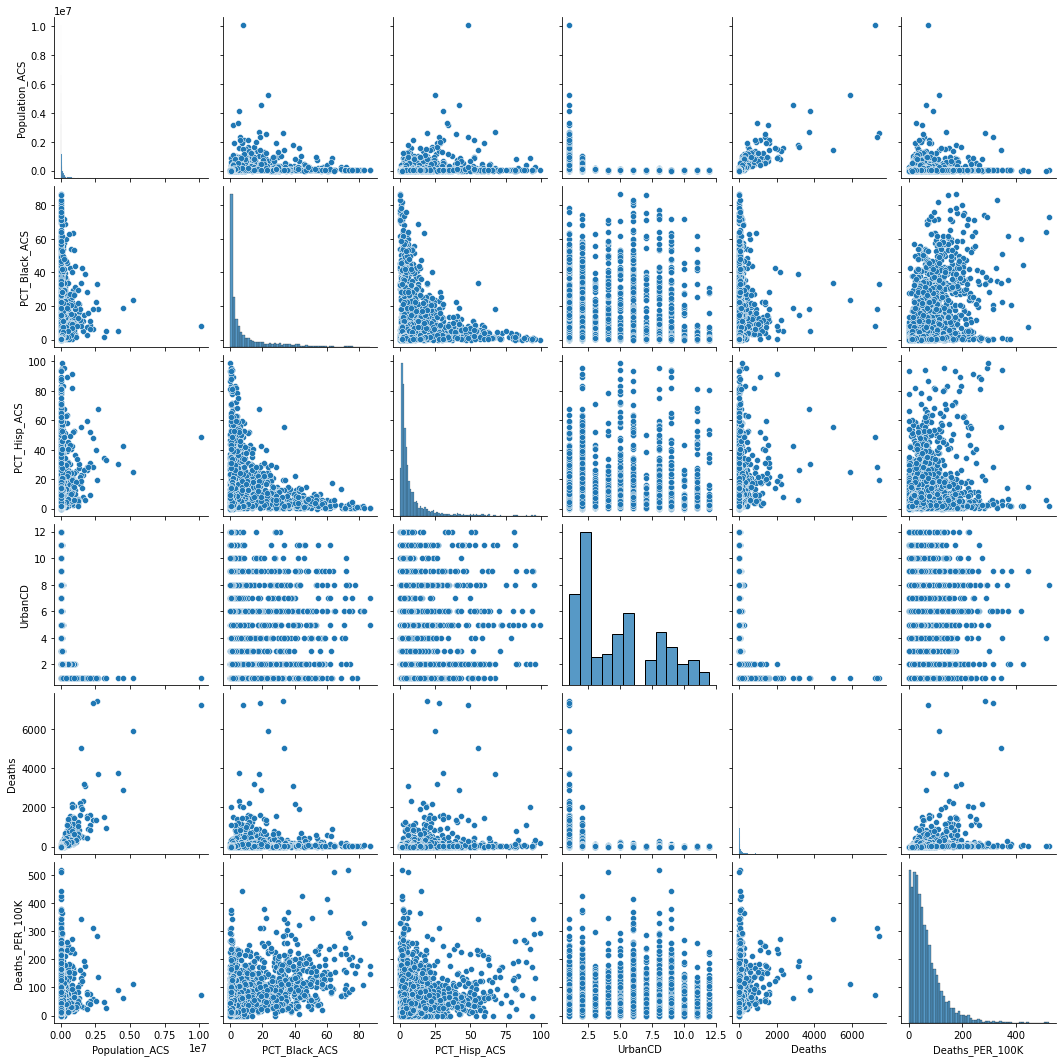

In [35]:
sns.pairplot(county)

In [23]:
county[county.Metro.isna() == True]

,County_FIPS,Name,StateCD,Population_ACS,PCT_Black_ACS,PCT_Hisp_ACS,UrbanCD,Metro,Deaths,Deaths_PER_100K


In [112]:
bigh = combined_sub[combined_sub.County_FIPS == "04001"]

In [220]:
list(bigh.columns)

['date',
 'County_FIPS',
 'StateCD',
 'Name',
 'retail_and_recreation_PCT_CFB',
 'grocery_and_pharmacy_PCT_CFB',
 'parks_PCT_CFB',
 'transit_stations_PCT_CFB',
 'workplaces_PCT_CFB',
 'residential_PCT_CFB',
 'retail_and_recreation_PCT_CFB_RollingAvg',
 'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 'parks_PCT_CFB_RollingAvg',
 'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'HS_DIPLOMA_ONLY_2018',
 'SOME_COLLEGE_2018',
 'BACHELORS_PLUS_2018',
 'Poverty_PCT_2018',
 'UrbanCD',
 'Median_Income_2018',
 'Population_ACS',
 'Population_Black_ACS',
 'Population_Hisp_ACS',
 'Population_Native_ACS',
 'PCT_Black_ACS',
 'PCT_Hisp_ACS',
 'PCT_Native_ACS',
 'UrbanCD_Description',
 'Metro',
 'State',
 'Confirmed',
 'Deaths',
 'Country/Region',
 'Deaths_Previous',
 'Confirmed_Previous',
 'Deaths_New',
 'Deaths_New_7',
 'Deaths_New_14',
 'Deaths_New_21',
 'Deaths_New_28',
 'Confirmed_New',
 'Confirmed_New_RollingAvg',
 'Deaths_New_RollingAvg',
 

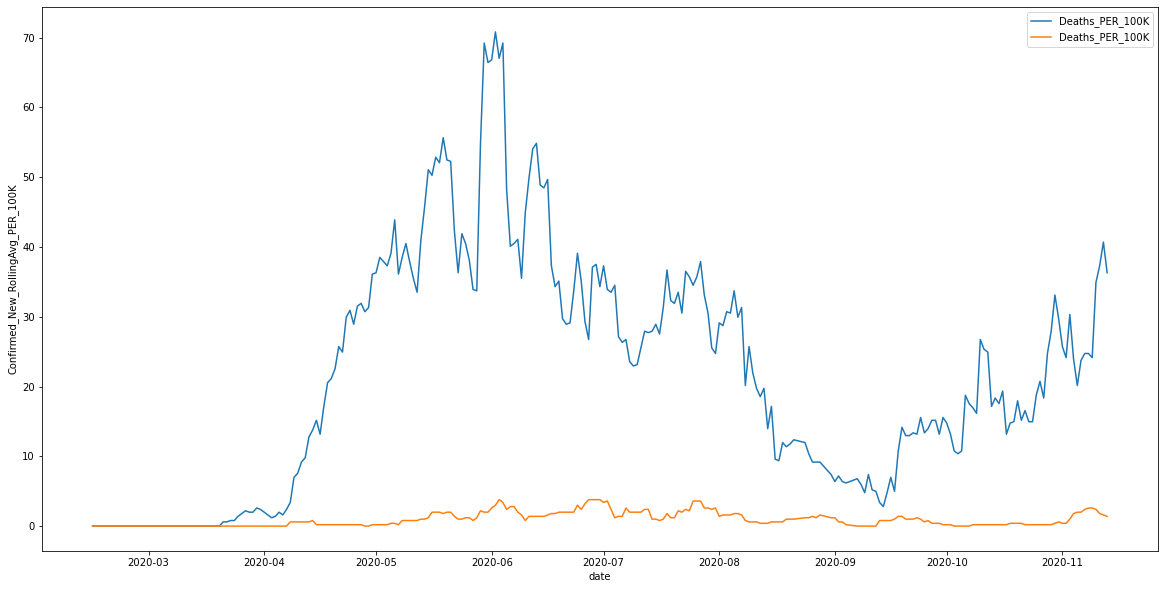

In [223]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) 


#sns.lineplot(x="date", y="Confirmed_New_RollingAvg_PER_100K", label = "Confirmed_PER_100K", data=bigh)

sns.lineplot(x="date", y="Confirmed_New_RollingAvg_PER_100K", label="Deaths_PER_100K", data=bigh)
sns.lineplot(x="date", y="Deaths_New_RollingAvg_PER_100K", label="Deaths_PER_100K", data=bigh)
#plt.set_fiz(10, 8.5)

plt.legend()

plt.show()

In [ ]:
## Graphing at County Level

In [733]:
import random as random

list_counties = list(county[county.Population_ACS >= 1000000].County_FIPS.unique())
list_random = random.choices(list_counties, k=4)

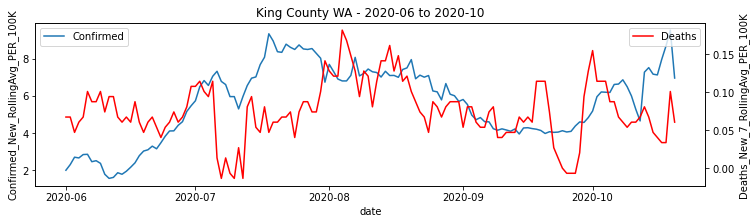

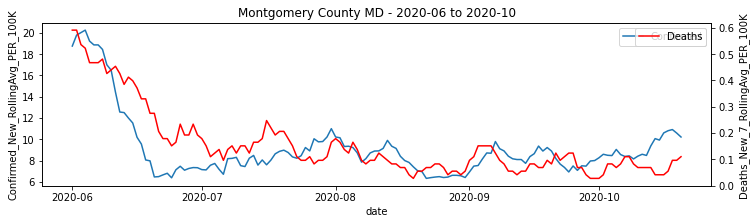

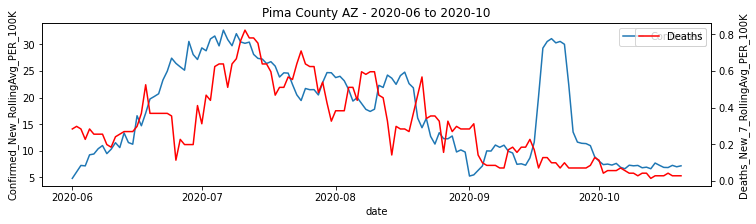

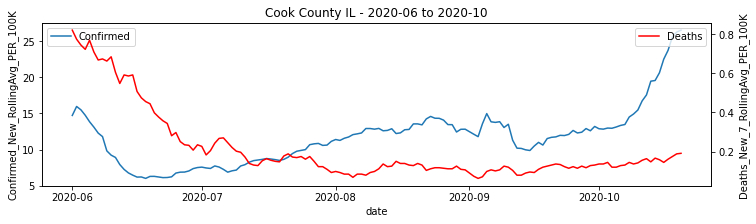

In [734]:
for i in list_random:
    bigh = combined_sub[combined_sub.County_FIPS == i]
    bigh = bigh[bigh.date <= '2020-10-20']
    bigh = bigh[bigh.date >= '2020-06-01']
    name_county = bigh.Name.iloc[0]+' '+bigh.StateCD.iloc[0]
    plt.figure(figsize=(12,3)) 
    ax = sns.lineplot(x="date", y="Confirmed_New_RollingAvg_PER_100K", label="Confirmed", data=bigh)
    ax2 = ax.twinx()
    ax2 = sns.lineplot(x="date", y="Deaths_New_7_RollingAvg_PER_100K", label="Deaths", color='red', data=bigh)
    #ax2 = sns.lineplot(x="date", y="Deaths_New_7_RollingAvg_PER_100K", label="Deaths", color='orange', data=bigh)
    #ax2 = sns.lineplot(x="date", y="Deaths_New_21_RollingAvg_PER_100K", label="Deaths", color='green', data=bigh)
    plt.title("{x} - 2020-06 to 2020-10".format(x=name_county))
    plt.show()

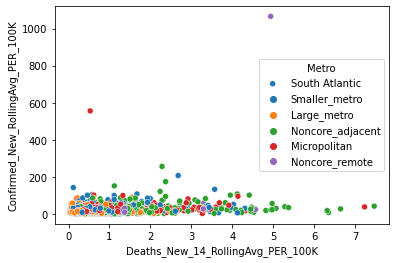

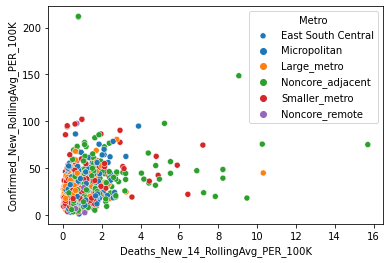

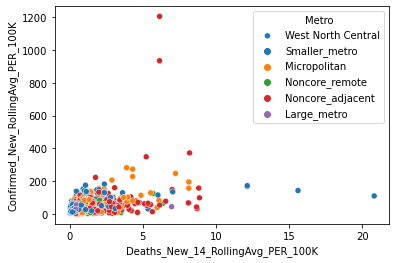

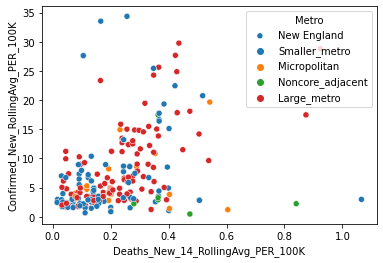

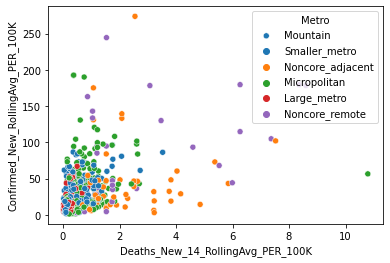

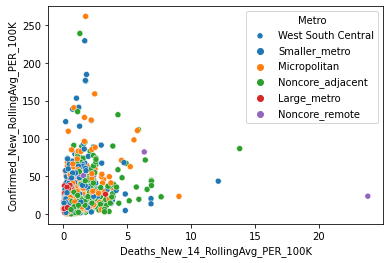

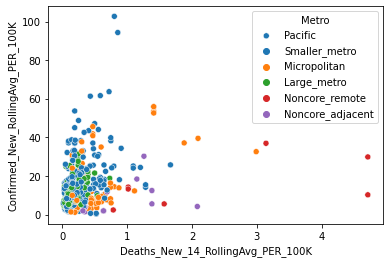

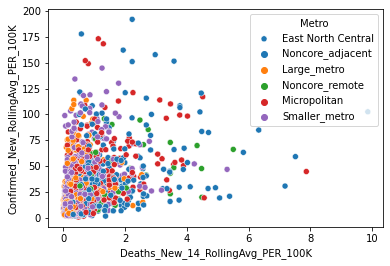

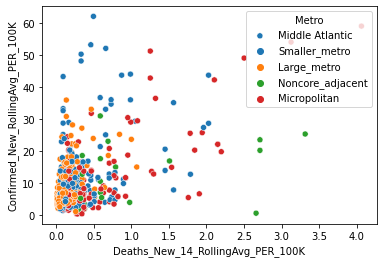

In [323]:
for i in list(combined_sub.Division.unique()):
    dataframe = combined_sub[(combined_sub.date >= '2020-08-01') & (combined_sub.Division == i)]
    dataframe = dataframe[dataframe.Deaths_New_14_RollingAvg_PER_100K > 0]
    dataframe = dataframe[dataframe.Confirmed_New_RollingAvg_PER_100K > 0]
    dataframe = dataframe.sample(frac=.1)
    #dataframe = dataframe.Confirmed_New_RollingAvg_PER_100K > 0
    sns.scatterplot(x="Deaths_New_14_RollingAvg_PER_100K",y="Confirmed_New_RollingAvg_PER_100K", hue="Metro",label="{x}".format(x=i),data=dataframe)
    plt.show()

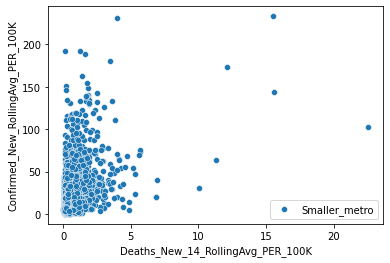

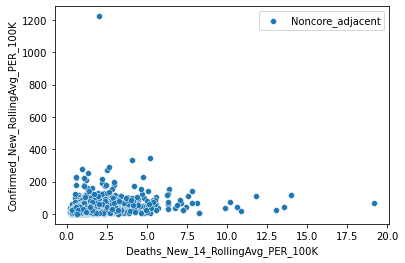

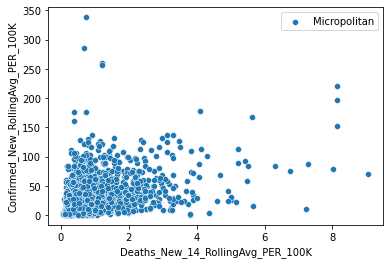

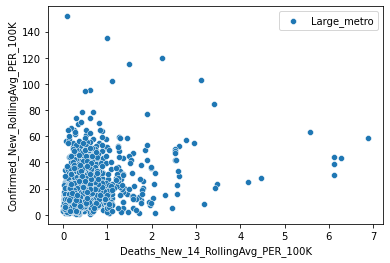

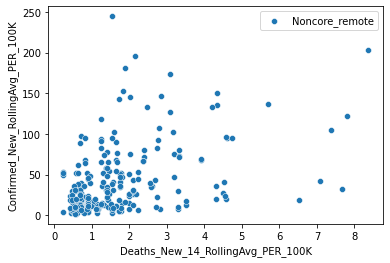

In [325]:
for i in list(combined_sub.Metro.unique()):
    dataframe = combined_sub[(combined_sub.date >= '2020-08-01') & (combined_sub.Metro == i)]
    dataframe = dataframe[dataframe.Deaths_New_14_RollingAvg_PER_100K > 0]
    dataframe = dataframe[dataframe.Confirmed_New_RollingAvg_PER_100K > 0]
    dataframe = dataframe.sample(frac=.1)
    #dataframe = dataframe.Confirmed_New_RollingAvg_PER_100K > 0
    sns.scatterplot(x="Deaths_New_14_RollingAvg_PER_100K",y="Confirmed_New_RollingAvg_PER_100K",label="{x}".format(x=i),data=dataframe)
    plt.show()

In [333]:
bigh[(bigh.date >= "2020-06-01") &(bigh.date <= "2020-07-01")][['date','Deaths','Deaths_New','Deaths_New_7','Deaths_New_7_RollingAvg','Deaths_New_7_RollingAvg_PER_100K']]

,date,Deaths,Deaths_New,Deaths_New_7,Deaths_New_7_RollingAvg,Deaths_New_7_RollingAvg_PER_100K
305248,2020-06-01,96,0.0,0.0,0.714286,0.043832
305249,2020-06-02,97,1.0,1.0,0.714286,0.043832
305250,2020-06-03,97,0.0,3.0,1.142857,0.070130
305251,2020-06-04,97,0.0,4.0,1.714286,0.105196
305252,2020-06-05,101,4.0,0.0,1.142857,0.070130
305253,2020-06-06,101,0.0,0.0,1.142857,0.070130
305254,2020-06-07,101,0.0,3.0,1.571429,0.096429
305255,2020-06-08,101,0.0,0.0,1.571429,0.096429
305256,2020-06-09,102,1.0,0.0,1.428571,0.087663
305257,2020-06-10,105,3.0,4.0,1.571429,0.096429


In [114]:
bigh.columns

Index(['date', 'County_FIPS', 'StateCD', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Country/Region', 'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New',
       'Deaths_New_7', 'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28',
       'Confirmed_

In [477]:
list_tup = []
for i in range(4,9):
    a = '2020-0{c}-01'.format(c=i)
    b = '2020-0{c}-01'.format(c=i+1)
    list_tup.append((a,b))

for i in range(10,11):
    a = '2020-{c}-01'.format(c=i)
    b = '2020-{c}-01'.format(c=i+1)
    list_tup.append((a,b))

In [479]:
county[(combined_sub.date > '2020-01-01') & (combined_sub.date < '2020-05-01')]

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

No handles with labels found to put in legend.


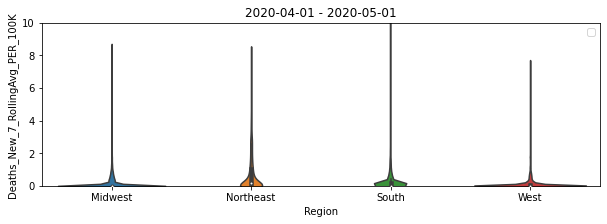

No handles with labels found to put in legend.


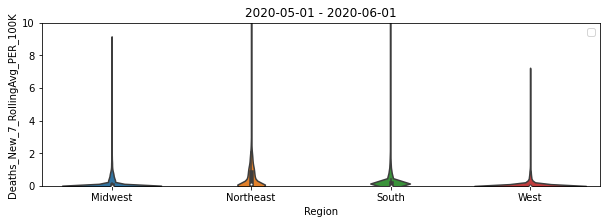

No handles with labels found to put in legend.


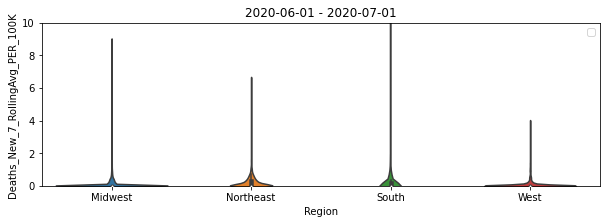

No handles with labels found to put in legend.


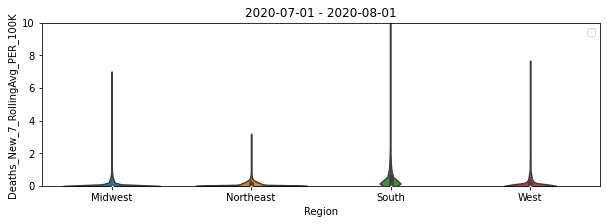

No handles with labels found to put in legend.


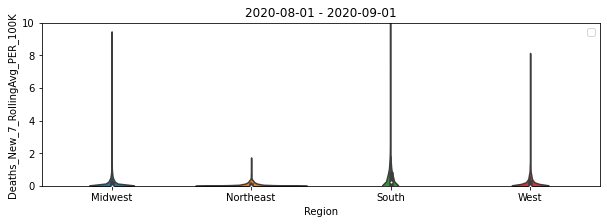

No handles with labels found to put in legend.


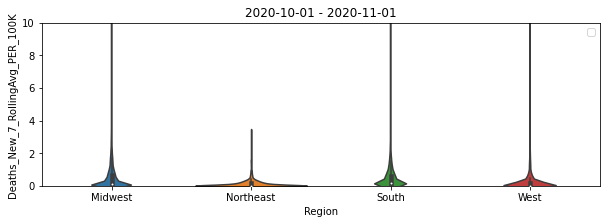

In [482]:
import matplotlib.pyplot as plt

for i in list_tup:
    startdate =  i[0]
    enddate = i[1]
    plt.figure(figsize=(10,3)) 
    frame = combined_sub[(combined_sub.date > startdate) & (combined_sub.date < enddate)]
    frame = frame.sort_values(by="Region")
    sns.violinplot(x="Region", y="Deaths_New_7_RollingAvg_PER_100K", label="work", data=frame)
    plt.title("{startdate} - {enddate}".format(startdate=startdate, enddate=enddate))
    plt.ylim(0,10.0)
    plt.legend()
    plt.show()
    #print(frame.head())

In [544]:
cols = list(combined_sub.columns)
county = combined_sub[(combined_sub.date >= '2020-10-09') & (combined_sub.date <= '2020-10-16') ]
county = county.groupby(["County_FIPS"])[cols].max()
county = pd.DataFrame(county)

In [545]:
county.head()

,date,County_FIPS,StateCD,Name,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,residential_PCT_CFB,...,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K,Region,Division
County_FIPS,,,,,,,,,,,,,,,,,,,,,
01001,2020-10-16,01001,AL,Autauga County,-3.0,8.0,-24.0,NaN,-17.0,7.0,...,7.267970,38.156843,25.697466,0.259570,0.519141,0.778711,0.259570,1.557422,South,East South Central
01003,2020-10-16,01003,AL,Baldwin County,0.0,7.0,47.0,10.0,-18.0,5.0,...,2.950433,23.111723,11.871979,0.842981,0.280994,0.140497,0.842981,0.842981,South,East South Central
01005,2020-10-16,01005,AL,Barbour County,2.0,-2.0,NaN,NaN,-16.0,2.0,...,0.000000,57.249723,20.718947,1.090471,0.000000,0.000000,0.000000,0.000000,South,East South Central
01007,2020-10-16,01007,AL,Bibb County,NaN,-1.0,NaN,NaN,-15.0,NaN,...,4.428698,75.287865,35.429584,1.898013,1.265342,0.632671,0.632671,1.265342,South,East South Central
01009,2020-10-16,01009,AL,Blount County,0.0,3.0,NaN,NaN,-16.0,7.0,...,13.872752,45.086445,27.250049,1.734094,1.981822,0.495455,0.247728,2.229549,South,East South Central


In [529]:
fipslist = ['081'+str(x) for x in range(10,99)]

In [530]:
yuma = county[county.County_FIPS.isin(fipslist)]

In [531]:
yuma['key'] = 'key'

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Make the county level dataframe population - weighted 

In [793]:
list_frame = []

from tqdm import tqdm

for i in tqdm(list(county.County_FIPS.unique())):
    frame = county[county.County_FIPS == i]
    frame['pop_1k'] = frame['Population_ACS']/1000 # Each row will represent 1k people
    frame['key'] = 'key'
    joinframe = pd.DataFrame(pd.Series(list(range(0,int(frame.pop_1k.max())))))
    joinframe['key'] = 'key'
    joinframe.columns = ['val','key']
    cartesian = frame.merge(joinframe, on="key")
    #frame_weighted = cartesian[cartesian.Deaths <= cartesian.val]
    list_frame.append(cartesian)

  0%|          | 0/2748 [00:00<?, ?it/s]/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
 84%|████████▍ | 2315/2748 [00:11<00:02, 192.07it/s]/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Seri

In [794]:
frame_concat = pd.concat(list_frame)

In [795]:
frame_concat

,date,County_FIPS,StateCD,Name,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,residential_PCT_CFB,...,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K,Region,Division,pop_1k,key,val
0,2020-10-16,01001,AL,Autauga County,-3.0,8.0,-24.0,NaN,-17.0,7.0,...,0.25957,0.519141,0.778711,0.259570,1.557422,South,East South Central,55.036,key,0.0
1,2020-10-16,01001,AL,Autauga County,-3.0,8.0,-24.0,NaN,-17.0,7.0,...,0.25957,0.519141,0.778711,0.259570,1.557422,South,East South Central,55.036,key,1.0
2,2020-10-16,01001,AL,Autauga County,-3.0,8.0,-24.0,NaN,-17.0,7.0,...,0.25957,0.519141,0.778711,0.259570,1.557422,South,East South Central,55.036,key,2.0
3,2020-10-16,01001,AL,Autauga County,-3.0,8.0,-24.0,NaN,-17.0,7.0,...,0.25957,0.519141,0.778711,0.259570,1.557422,South,East South Central,55.036,key,3.0
4,2020-10-16,01001,AL,Autauga County,-3.0,8.0,-24.0,NaN,-17.0,7.0,...,0.25957,0.519141,0.778711,0.259570,1.557422,South,East South Central,55.036,key,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2020-10-16,56045,WY,Weston County,NaN,NaN,NaN,NaN,-9.0,NaN,...,0.00000,0.000000,0.000000,2.007266,2.007266,West,Mountain,7.117,key,2.0
3,2020-10-16,56045,WY,Weston County,NaN,NaN,NaN,NaN,-9.0,NaN,...,0.00000,0.000000,0.000000,2.007266,2.007266,West,Mountain,7.117,key,3.0
4,2020-10-16,56045,WY,Weston County,NaN,NaN,NaN,NaN,-9.0,NaN,...,0.00000,0.000000,0.000000,2.007266,2.007266,West,Mountain,7.117,key,4.0
5,2020-10-16,56045,WY,Weston County,NaN,NaN,NaN,NaN,-9.0,NaN,...,0.00000,0.000000,0.000000,2.007266,2.007266,West,Mountain,7.117,key,5.0


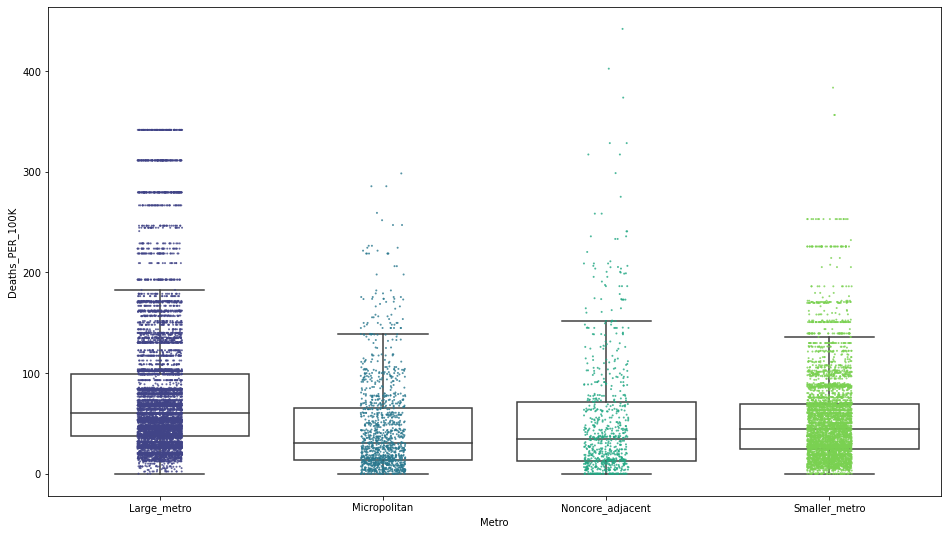

In [801]:
plt.figure(figsize=(16,9)) 
frame = frame_concat.sample(frac=.05)
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]
frame.sort_values(by="Metro", inplace=True)
#frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro"])]
frame = frame.sort_values(by="Metro")
#sns.violinplot(x="Metro", y="Deaths_PER_100K", label="work", data=frame, scale="count")
sns.boxplot(x="Metro", y="Deaths_PER_100K", data=frame,  boxprops={'facecolor':'None'}, fliersize=0)
sns.stripplot(x="Metro", y="Deaths_PER_100K", label="work", data=frame, size=2, alpha=.8, dodge=True, palette="viridis")
plt.show()


/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


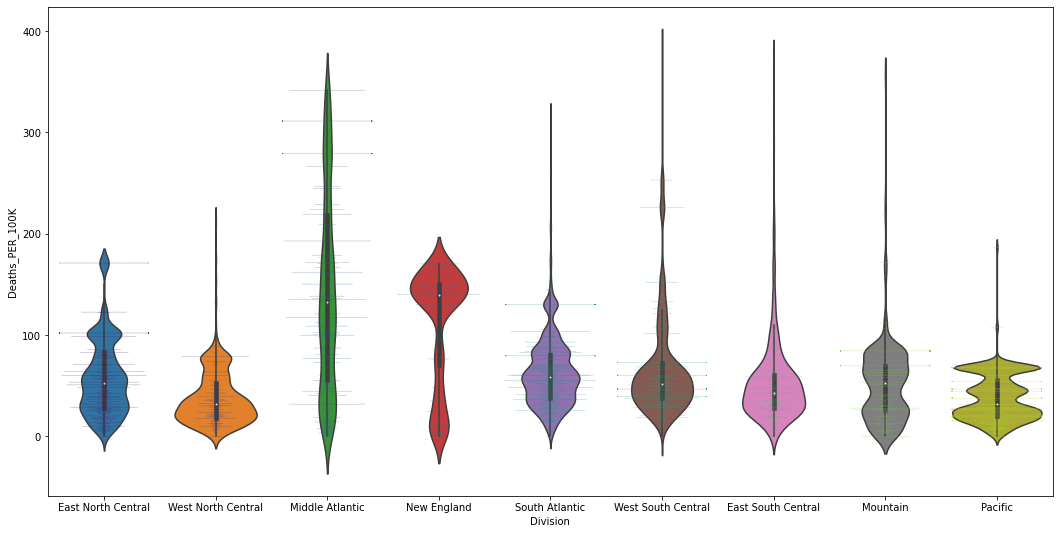

In [632]:
plt.figure(figsize=(18,9)) 
frame = frame_concat #.sample(frac=.25)
frame.sort_values(by="Division", inplace=True)
frame = frame.sort_values(by="Region")
sns.violinplot(x="Division", y="Deaths_PER_100K", label="work", data=frame)
#sns.boxplot(x="Division", y="Deaths_PER_100K", data=frame,  boxprops={'facecolor':'None'}, fliersize=0)
sns.swarmplot(x="Division", y="Deaths_PER_100K", label="work", data=frame, size=.5, alpha=.6, dodge=True, palette="viridis")
plt.show()


/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


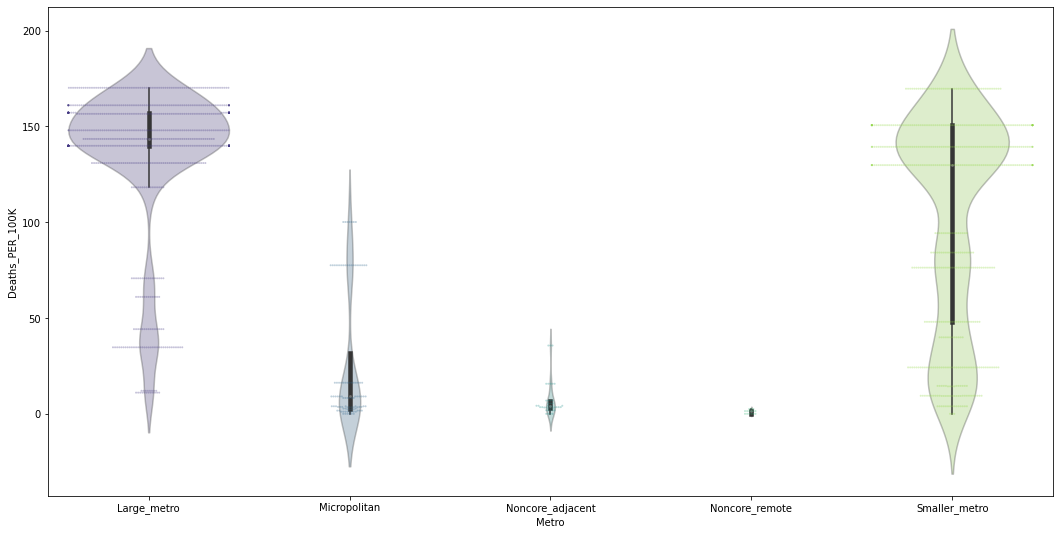

In [658]:
plt.figure(figsize=(18,9)) 
frame = frame_concat[frame_concat.Division == "New England"] #.sample(frac=.25)
frame.sort_values(by="Metro", inplace=True)
ax = sns.violinplot(x="Metro", y="Deaths_PER_100K", label="work", palette="viridis", alpha=.2, scale="count", data=frame)
#sns.boxplot(x="Metro", y="Deaths_PER_100K", data=frame,  boxprops={'facecolor':'None'}, fliersize=0)
ax = sns.swarmplot(x="Metro", y="Deaths_PER_100K", label="work", data=frame, size=2, dodge=True, palette="viridis")
plt.setp(ax.collections, alpha=.3)
plt.show()


In [699]:
import numpy as np
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


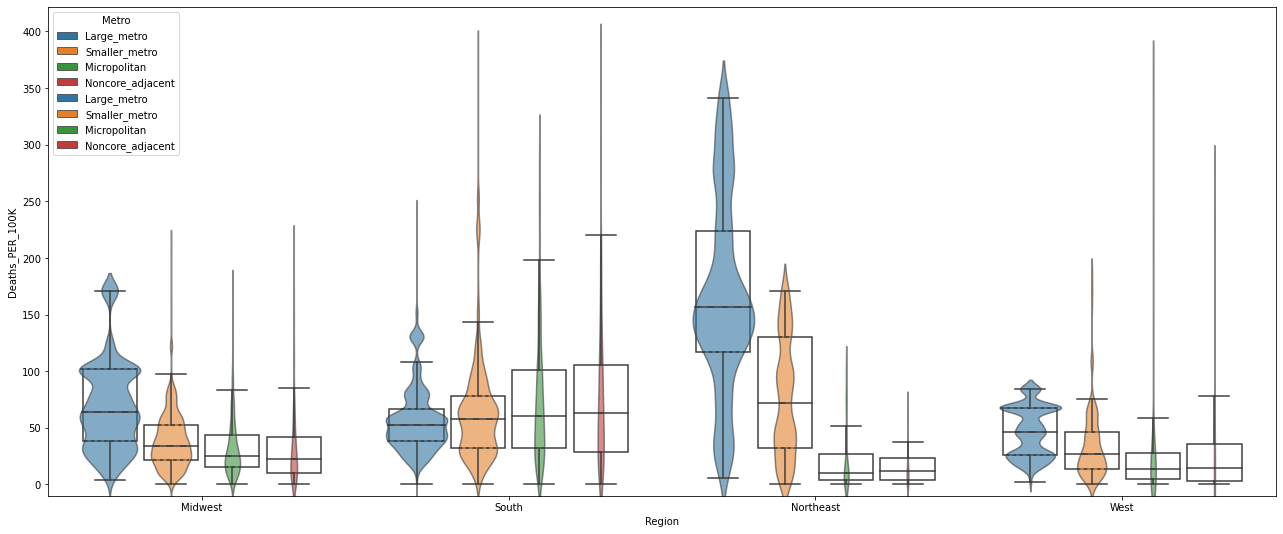

In [704]:
frame = frame_concat
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]
#plt.figure(figsize=(22,9)) 

fig = plt.figure(figsize=(22, 9))

ax = sns.boxplot(x="Region", y="Deaths_PER_100K", hue="Metro", data=frame, boxprops={'facecolor':'None'}, fliersize=0)
ax = sns.violinplot(x="Region", y="Deaths_PER_100K",  hue="Metro", scale="count", data=frame, inner="quart", size=2, dodge=True, despine=True)
plt.setp(ax.collections, alpha=.4)
plt.ylim(-10,frame.Deaths_PER_100K.max()*1.1)

adjust_box_widths(fig, 0.9)

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


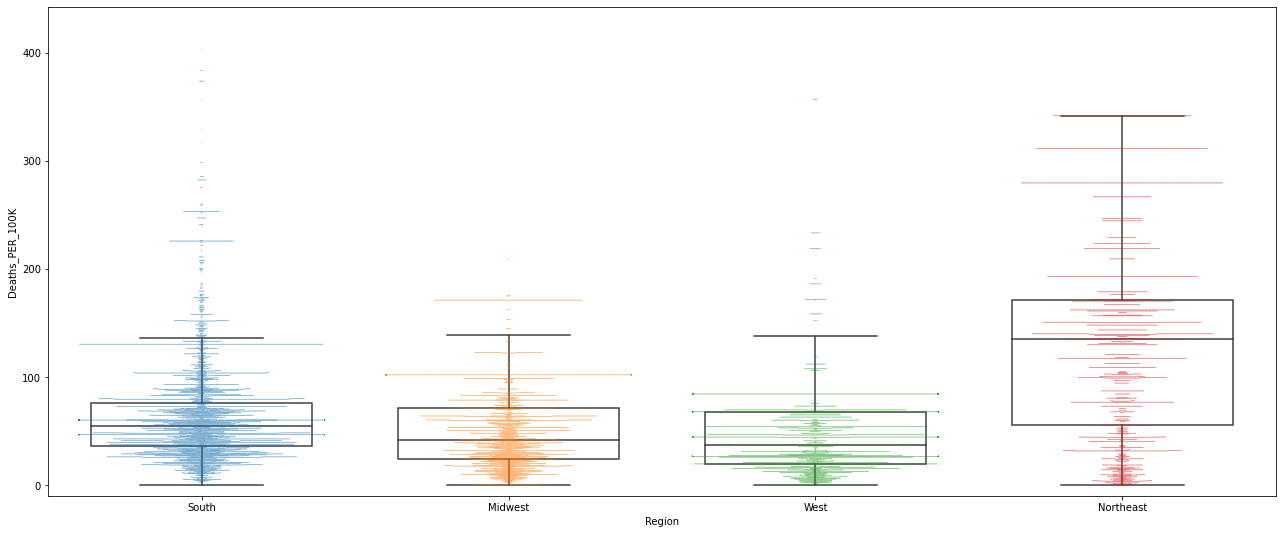

In [803]:
frame = frame_concat.sample(frac=.1)
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]
#plt.figure(figsize=(22,9)) 

fig = plt.figure(figsize=(22, 9))

ax = sns.boxplot(x="Region", y="Deaths_PER_100K", data=frame, boxprops={'facecolor':'None'}, fliersize=0)
ax = sns.swarmplot(x="Region", y="Deaths_PER_100K",  alpha=.95, data=frame, size=.75, dodge=True)
#plt.setp(ax.collections, alpha=.9)
plt.ylim(-10,frame.Deaths_PER_100K.max()*1.1)

adjust_box_widths(fig, 0.9)

In [735]:
frame_concat.columns

Index(['date', 'County_FIPS', 'StateCD', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New', 'Deaths_New_7',
       'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28', 'Confirmed_New',
       'Confirmed_N

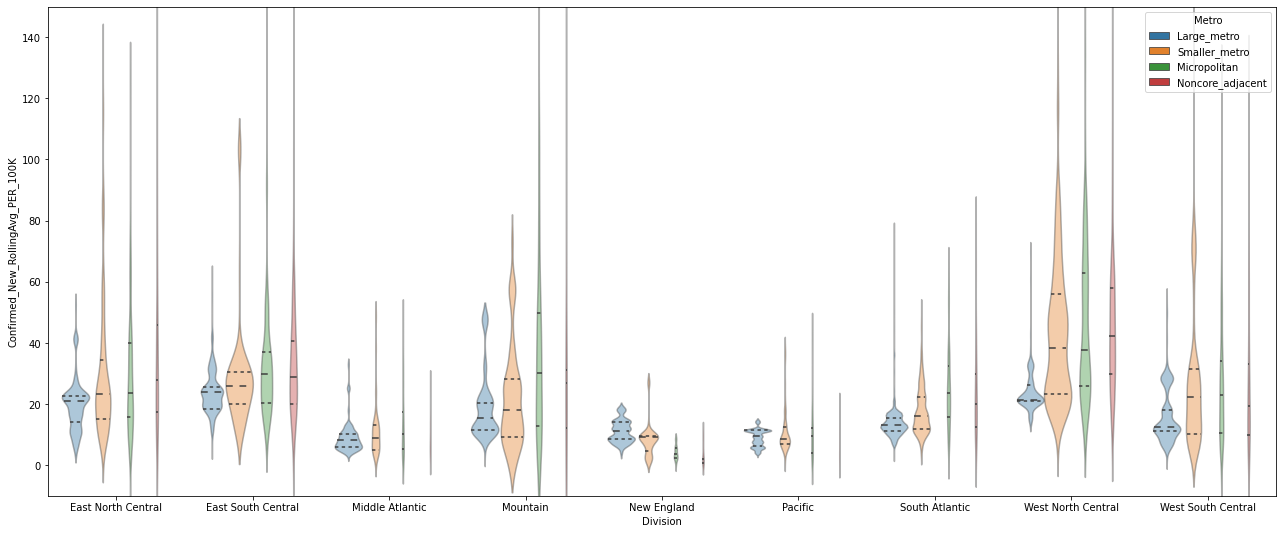

In [769]:
frame = frame_concat
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]
#plt.figure(figsize=(22,9)) 

fig = plt.figure(figsize=(22, 9))

#ax = sns.boxplot(x="Division", y="Confirmed_New_RollingAvg_PER_100K", hue="Metro", data=frame, fliersize=0)
ax = sns.violinplot(x="Division", y="Confirmed_New_RollingAvg_PER_100K",  hue="Metro", scale="count", data=frame, inner="quart", size=2, dodge=True, despine=True)
plt.setp(ax.collections, alpha=.4)
plt.ylim(-10,150)

adjust_box_widths(fig, 0.9)

In [774]:
pop = pd.DataFrame(frame.groupby(["Division"])["Population_ACS"].sum())

In [788]:
pop['pop'] = pop.Population_ACS/1000000

In [792]:
1.553625e+04

count    2.748000e+03
mean     1.148397e+05
std      3.474378e+05
min      6.000000e+02
25%      1.553625e+04
50%      3.183500e+04
75%      8.036825e+04
max      1.010572e+07
Name: Population_ACS, dtype: float64

In [ ]:
frame = frame_concat.sample(frac=.1)
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro"])]
#plt.figure(figsize=(22,9)) 

fig = plt.figure(figsize=(22, 9))

ax = sns.boxplot(x="Region", y="Deaths_New_7_RollingAvg_PER_100K", hue="Metro", data=frame, boxprops={'facecolor':'None'}, fliersize=0)
ax = sns.violinplot(x="Region", y="Deaths_New_7_RollingAvg_PER_100K",  hue="Metro", scale="count", data=frame, inner="quart", size=2, dodge=True, despine=True)
plt.setp(ax.collections, alpha=.4)
plt.ylim(-1,2.5)

adjust_box_widths(fig, 0.9)

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Deaths_New_7_RollingAvg_PER_100K', ylabel='Density'>

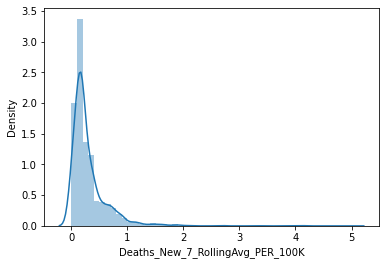

In [754]:
sns.distplot(frame.Deaths_New_7_RollingAvg_PER_100K)

In [805]:
combined_sub['week_of_yr'] = combined_sub.date.dt.week

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [810]:
cols = list(combined_sub.columns)

list_df = [] 

for i in tqdm(range(12,combined_sub.week_of_yr.max())):
    county = combined_sub[(combined_sub.week_of_yr == i)]
    county = county.groupby(["County_FIPS"])[cols].max()
    county = pd.DataFrame(county)
    list_df.append(county)

In [812]:
list_df[2]

,date,County_FIPS,StateCD,Name,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,residential_PCT_CFB,...,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K,Region,Division,week_of_yr
County_FIPS,,,,,,,,,,,,,,,,,,,,,
01001,2020-04-05,01001,AL,Autauga County,-16.0,37.0,NaN,NaN,-25.0,17.0,...,3.633985,2.076563,0.000000,0.25957,0.259570,0.259570,0.778711,South,East South Central,14
01003,2020-04-05,01003,AL,Baldwin County,-36.0,-4.0,-23.0,-15.0,-27.0,15.0,...,2.458694,1.756210,0.070248,0.00000,0.070248,0.140497,0.070248,South,East South Central,14
01005,2020-04-05,01005,AL,Barbour County,-7.0,7.0,NaN,NaN,-19.0,NaN,...,7.633296,1.635706,0.000000,0.00000,0.000000,0.000000,0.545235,South,East South Central,14
01007,2020-04-05,01007,AL,Bibb County,-8.0,17.0,NaN,NaN,-21.0,NaN,...,13.286094,3.163356,0.000000,0.00000,0.000000,0.000000,0.000000,South,East South Central,14
01009,2020-04-05,01009,AL,Blount County,-19.0,20.0,NaN,NaN,-22.0,16.0,...,3.468188,1.734094,0.000000,0.00000,0.000000,0.000000,0.000000,South,East South Central,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2020-04-05,56037,WY,Sweetwater County,-29.0,5.0,NaN,29.0,-25.0,16.0,...,2.245828,1.283330,0.000000,0.00000,0.000000,0.000000,0.000000,West,Mountain,14
56039,2020-04-05,56039,WY,Teton County,-77.0,-43.0,-59.0,NaN,-55.0,NaN,...,26.174584,15.580110,0.000000,0.00000,0.000000,0.000000,0.000000,West,Mountain,14
56041,2020-04-05,56041,WY,Uinta County,-20.0,6.0,NaN,19.0,-20.0,NaN,...,4.817420,1.376406,0.000000,0.00000,0.000000,0.000000,0.000000,West,Mountain,14


In [813]:
def explode_df_dateweight(df):
    list_frame  = []
    for i in tqdm(list(df.County_FIPS.unique())):
        frame = df[df.County_FIPS == i]
        frame['pop_1k'] = frame['Population_ACS']/1000 # Each row will represent 1k people
        frame['key'] = 'key'
        joinframe = pd.DataFrame(pd.Series(list(range(0,int(frame.pop_1k.max())))))
        joinframe['key'] = 'key'
        joinframe.columns = ['val','key']
        cartesian = frame.merge(joinframe, on="key")
        #frame_weighted = cartesian[cartesian.Deaths <= cartesian.val]
        list_frame.append(cartesian)
    exploded_frame = pd.concat(list_frame)
    return exploded_frame

In [815]:
exp = explode_df_dateweight(list_df[2])

  0%|          | 0/2802 [00:00<?, ?it/s]/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
 84%|████████▍ | 2348/2802 [00:13<00:02, 190.27it/s]/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will

In [824]:
exp[exp.County_FIPS == '56023'][['Population_ACS','val']]

,Population_ACS,val
0,18791.0,0.0
1,18791.0,1.0
2,18791.0,2.0
3,18791.0,3.0
4,18791.0,4.0
5,18791.0,5.0
6,18791.0,6.0
7,18791.0,7.0
8,18791.0,8.0
9,18791.0,9.0


In [825]:
list_exploded_df = [explode_df_dateweight(i) for i in list_df]

  0%|          | 0/2781 [00:00<?, ?it/s]/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
 84%|████████▍ | 2332/2781 [00:12<00:02, 185.63it/s]/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will

In [1090]:
colslist = list(list_exploded_df[2].columns)
Yvarlist = [i for i in colslist if "RollingAvg" in i]

In [1095]:
colslist

['date',
 'County_FIPS',
 'StateCD',
 'Name',
 'retail_and_recreation_PCT_CFB',
 'grocery_and_pharmacy_PCT_CFB',
 'parks_PCT_CFB',
 'transit_stations_PCT_CFB',
 'workplaces_PCT_CFB',
 'residential_PCT_CFB',
 'retail_and_recreation_PCT_CFB_RollingAvg',
 'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 'parks_PCT_CFB_RollingAvg',
 'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'HS_DIPLOMA_ONLY_2018',
 'SOME_COLLEGE_2018',
 'BACHELORS_PLUS_2018',
 'Poverty_PCT_2018',
 'UrbanCD',
 'Median_Income_2018',
 'Population_ACS',
 'Population_Black_ACS',
 'Population_Hisp_ACS',
 'Population_Native_ACS',
 'PCT_Black_ACS',
 'PCT_Hisp_ACS',
 'PCT_Native_ACS',
 'UrbanCD_Description',
 'Metro',
 'State',
 'Confirmed',
 'Deaths',
 'Deaths_Previous',
 'Confirmed_Previous',
 'Deaths_New',
 'Deaths_New_7',
 'Deaths_New_14',
 'Deaths_New_21',
 'Deaths_New_28',
 'Confirmed_New',
 'Confirmed_New_RollingAvg',
 'Deaths_New_RollingAvg',
 'Deaths_New_7_Rolli

In [1094]:
Yvar_list = ['retail_and_recreation_PCT_CFB_RollingAvg',
 'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 'parks_PCT_CFB_RollingAvg',
 'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'Confirmed_New_RollingAvg_PER_100K',
 'Deaths_New_RollingAvg_PER_100K']

In [1136]:
grouplist = ['Metro','Region']

In [1137]:
import os
os.getcwd()
os.chdir("/Users/philip.ballentine/Documents/grphimg")

In [1138]:
#conda install -c conda-forge imageio

  9%|▉         | 3/34 [00:05<00:54,  1.76s/it]


KeyboardInterrupt: 

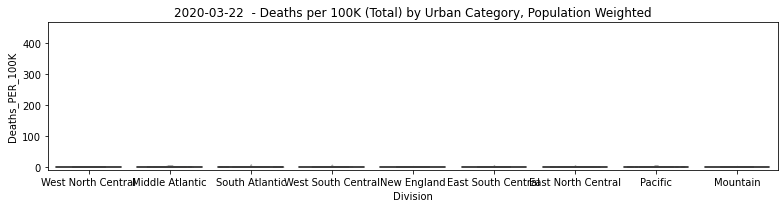

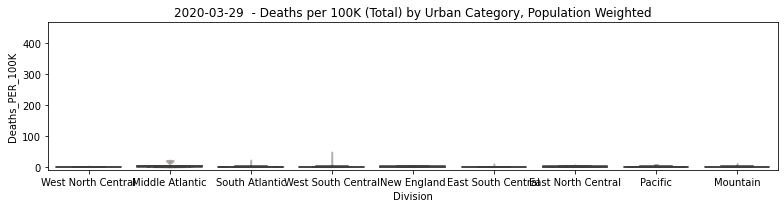

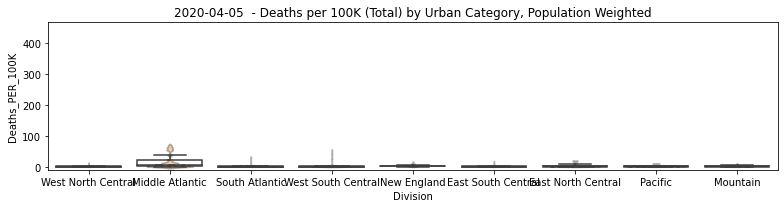

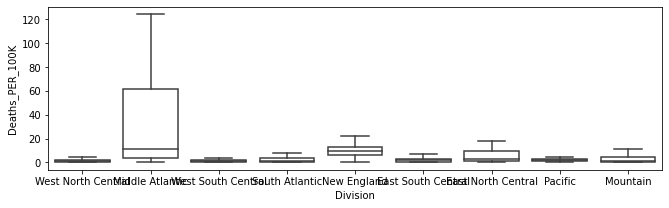

In [1139]:
for i in tqdm(list_exploded_df):
#for i in tqdm(random.choices(list_exploded_df, k= 4)):
    frame = i
    frame = frame.sort_values(by="Metro")
    fig = plt.figure(figsize=(11, 3))
    frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro"])]
    
    ax = sns.boxplot(x="Division", y="Deaths_PER_100K", data=frame, boxprops={'facecolor':'None'}, fliersize=0)
    ax = sns.violinplot(x="Division", y="Deaths_PER_100K", scale="count", data=frame, inner="quart", dodge=True, despine=True)

    plt.setp(ax.collections, alpha=.4)
    plt.ylim(-10,combined_sub.Deaths_PER_100K.max()*.9)

    datestr = str(i.date.max())[0:11]
    plt.title("{datestr} - Deaths per 100K (Total) by Urban Category, Population Weighted".format(datestr=datestr))
    plt.tight_layout()
    plt.savefig("{title}.png".format(title=title), dpi=300)

In [1140]:
def gif_from_images(animated_filename="movie.gif"):
    """ goes into the working directory (set earlier) and combined all images into an animated gif"""
    import imageio
    image_list = sorted(os.listdir(os.getcwd()))
    image_list_sub = [i for i in image_list if '2020' in i]
    images = []
    for filename in image_list_sub:
        images.append(imageio.imread(filename))
    imageio.mimsave(animated_filename+'.gif', images, duration=.5)

In [1141]:
def loop_for_gif_by_metro(Yvar="Deaths_PER_100K", group="Metro"):
    
    ## Creating file structure
    import os 
    foldername = "{Yvar}_by_{group}".format(Yvar=Yvar, group=group)
    try:
        os.chdir("/Users/philip.ballentine/Documents/grphimg/{foldername}".format(foldername=foldername))
    except:
        os.mkdir("/Users/philip.ballentine/Documents/grphimg/{foldername}".format(foldername=foldername))
        os.chdir("/Users/philip.ballentine/Documents/grphimg/{foldername}".format(foldername=foldername))
    
    ## Iterating through dataframes and creating the plots
    #for i in tqdm(random.choices(list_exploded_df, k= 10)):
    for i in tqdm(list_exploded_df): 
        frame = i
        frame = frame.sort_values(by="Metro")
        fig = plt.figure(figsize=(11, 3))
        #frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro"])]
        ax = sns.boxplot(x=group, y=Yvar, data=frame, boxprops={'facecolor':'None'}, fliersize=0)
        ax = sns.violinplot(x=group, y=Yvar, scale="count", data=frame, inner="quart", dodge=True, despine=True)

        plt.setp(ax.collections, alpha=.4)
        ## Setting the Y-Lims
        if "PCT" in Yvar:
            plt.ylim(combined_sub['{Yvar}'.format(Yvar=Yvar)].min(),combined_sub['{Yvar}'.format(Yvar=Yvar)].max())
        else:
            plt.ylim(-10,combined_sub['{Yvar}'.format(Yvar=Yvar)].max()*.85)
        
        ## Titles and file saving
        datestr = str(i.date.max())[0:11]
        plt.title("{datestr} - {Yvar} by {group}, Population Weighted".format(datestr=datestr, Yvar=Yvar, group=group))
        plt.tight_layout()
        plt.savefig("{datestr}.png".format(datestr=datestr), dpi=300)
        print("{datestr}.png has been created in {foldername}".format(datestr=datestr, foldername=foldername))

## Animated GIF creation
    gif_from_images(animated_filename=foldername)

  3%|▎         | 1/34 [00:01<00:35,  1.09s/it]

2020-03-22 .png has been created in Deaths_PER_100K_by_Metro


  6%|▌         | 2/34 [00:02<00:35,  1.11s/it]

2020-03-29 .png has been created in Deaths_PER_100K_by_Metro


  9%|▉         | 3/34 [00:03<00:35,  1.13s/it]

2020-04-05 .png has been created in Deaths_PER_100K_by_Metro


 12%|█▏        | 4/34 [00:04<00:34,  1.15s/it]

2020-04-12 .png has been created in Deaths_PER_100K_by_Metro


 15%|█▍        | 5/34 [00:05<00:33,  1.16s/it]

2020-04-19 .png has been created in Deaths_PER_100K_by_Metro


 18%|█▊        | 6/34 [00:07<00:33,  1.18s/it]

2020-04-26 .png has been created in Deaths_PER_100K_by_Metro


 21%|██        | 7/34 [00:08<00:31,  1.18s/it]

2020-05-03 .png has been created in Deaths_PER_100K_by_Metro


 24%|██▎       | 8/34 [00:09<00:31,  1.19s/it]

2020-05-10 .png has been created in Deaths_PER_100K_by_Metro


 26%|██▋       | 9/34 [00:10<00:29,  1.20s/it]

2020-05-17 .png has been created in Deaths_PER_100K_by_Metro


 29%|██▉       | 10/34 [00:11<00:29,  1.22s/it]

2020-05-24 .png has been created in Deaths_PER_100K_by_Metro


 32%|███▏      | 11/34 [00:13<00:28,  1.22s/it]

2020-05-31 .png has been created in Deaths_PER_100K_by_Metro


 35%|███▌      | 12/34 [00:14<00:26,  1.21s/it]

2020-06-07 .png has been created in Deaths_PER_100K_by_Metro


 38%|███▊      | 13/34 [00:15<00:25,  1.21s/it]

2020-06-14 .png has been created in Deaths_PER_100K_by_Metro


 41%|████      | 14/34 [00:16<00:24,  1.21s/it]

2020-06-21 .png has been created in Deaths_PER_100K_by_Metro


 44%|████▍     | 15/34 [00:17<00:22,  1.21s/it]

2020-06-28 .png has been created in Deaths_PER_100K_by_Metro


 47%|████▋     | 16/34 [00:19<00:21,  1.21s/it]

2020-07-05 .png has been created in Deaths_PER_100K_by_Metro


 50%|█████     | 17/34 [00:20<00:20,  1.22s/it]

2020-07-12 .png has been created in Deaths_PER_100K_by_Metro


 53%|█████▎    | 18/34 [00:21<00:19,  1.22s/it]

2020-07-19 .png has been created in Deaths_PER_100K_by_Metro


 56%|█████▌    | 19/34 [00:22<00:18,  1.22s/it]

2020-07-26 .png has been created in Deaths_PER_100K_by_Metro


 59%|█████▉    | 20/34 [00:24<00:17,  1.22s/it]

2020-08-02 .png has been created in Deaths_PER_100K_by_Metro


/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 62%|██████▏   | 21/34 [00:25<00:15,  1.22s/it]

2020-08-09 .png has been created in Deaths_PER_100K_by_Metro


 65%|██████▍   | 22/34 [00:26<00:14,  1.22s/it]

2020-08-16 .png has been created in Deaths_PER_100K_by_Metro


 68%|██████▊   | 23/34 [00:27<00:13,  1.22s/it]

2020-08-23 .png has been created in Deaths_PER_100K_by_Metro


 71%|███████   | 24/34 [00:28<00:12,  1.22s/it]

2020-08-30 .png has been created in Deaths_PER_100K_by_Metro


 74%|███████▎  | 25/34 [00:30<00:10,  1.21s/it]

2020-09-06 .png has been created in Deaths_PER_100K_by_Metro


 76%|███████▋  | 26/34 [00:31<00:09,  1.22s/it]

2020-09-13 .png has been created in Deaths_PER_100K_by_Metro


 79%|███████▉  | 27/34 [00:32<00:08,  1.22s/it]

2020-09-20 .png has been created in Deaths_PER_100K_by_Metro


 82%|████████▏ | 28/34 [00:33<00:07,  1.22s/it]

2020-09-27 .png has been created in Deaths_PER_100K_by_Metro


 85%|████████▌ | 29/34 [00:35<00:06,  1.22s/it]

2020-10-04 .png has been created in Deaths_PER_100K_by_Metro


 88%|████████▊ | 30/34 [00:36<00:04,  1.23s/it]

2020-10-11 .png has been created in Deaths_PER_100K_by_Metro


 91%|█████████ | 31/34 [00:37<00:03,  1.23s/it]

2020-10-18 .png has been created in Deaths_PER_100K_by_Metro


 94%|█████████▍| 32/34 [00:38<00:02,  1.27s/it]

2020-10-25 .png has been created in Deaths_PER_100K_by_Metro


 97%|█████████▋| 33/34 [00:40<00:01,  1.25s/it]

2020-11-01 .png has been created in Deaths_PER_100K_by_Metro


100%|██████████| 34/34 [00:41<00:00,  1.22s/it]

2020-11-08 .png has been created in Deaths_PER_100K_by_Metro


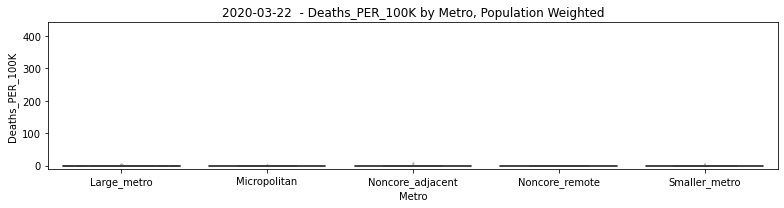

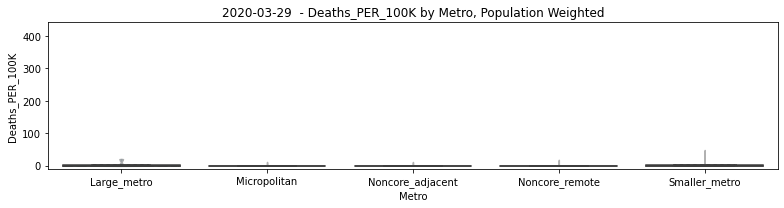

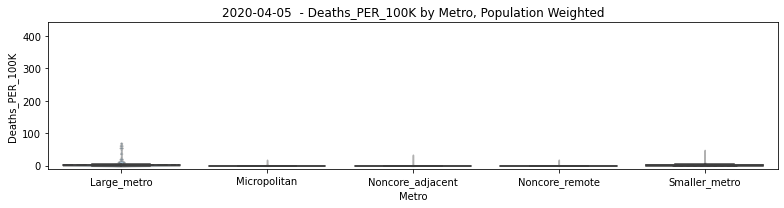

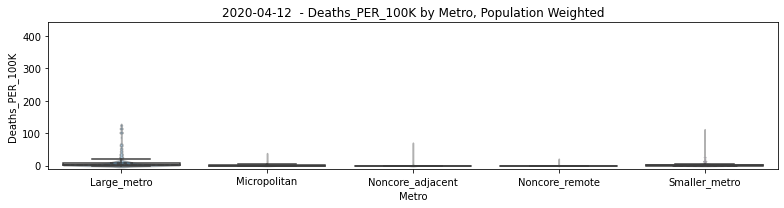

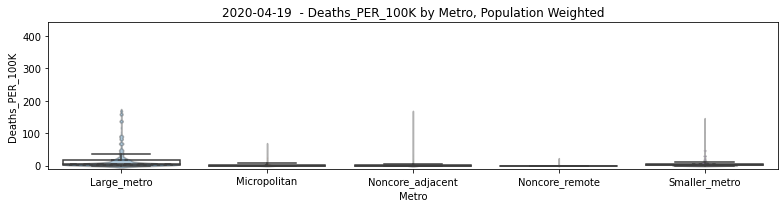

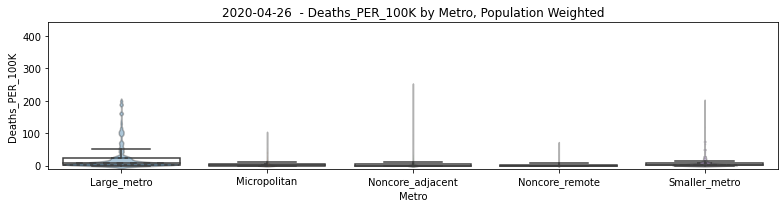

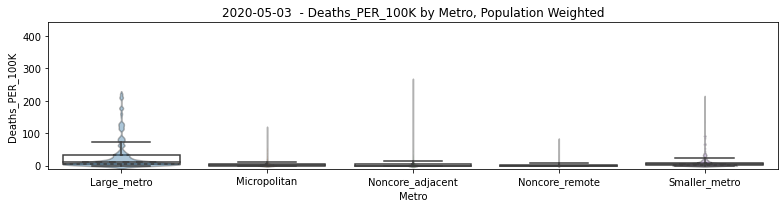

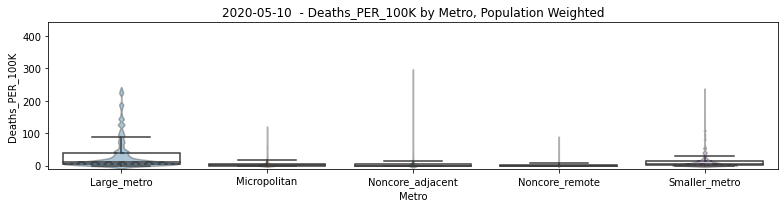

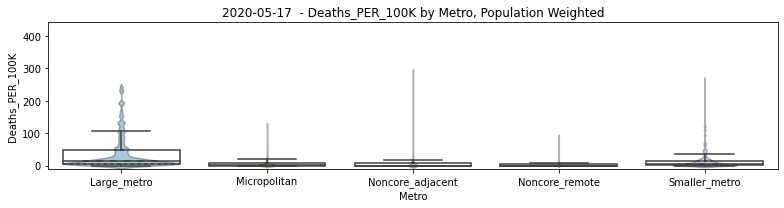

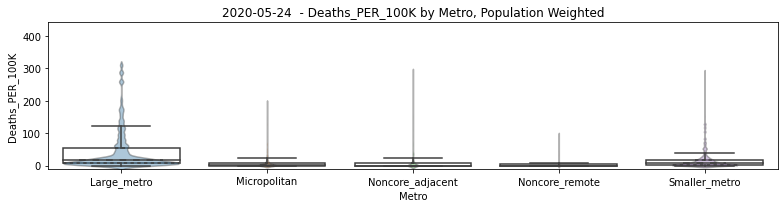

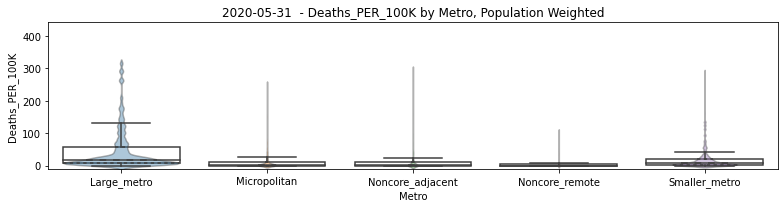

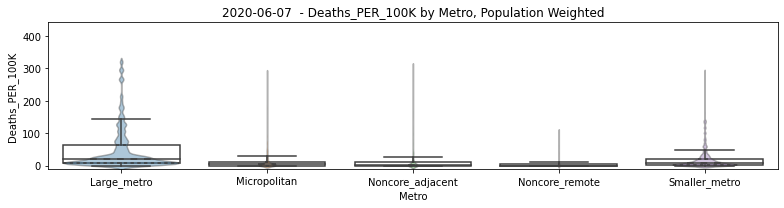

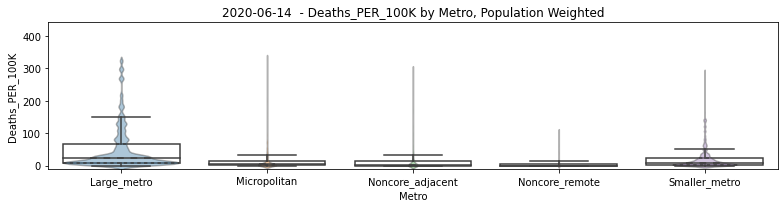

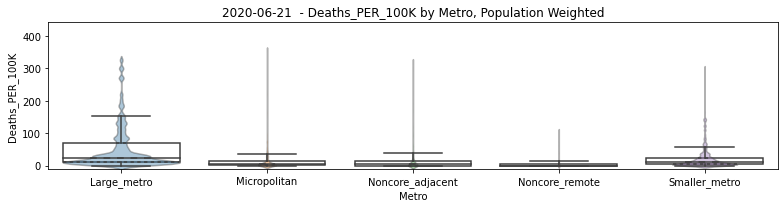

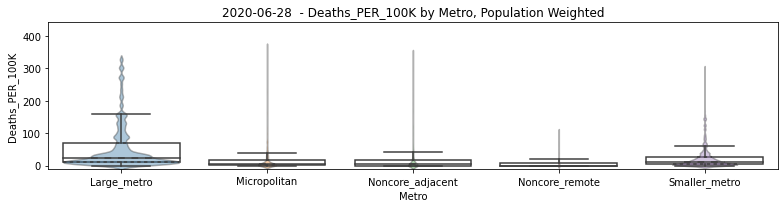

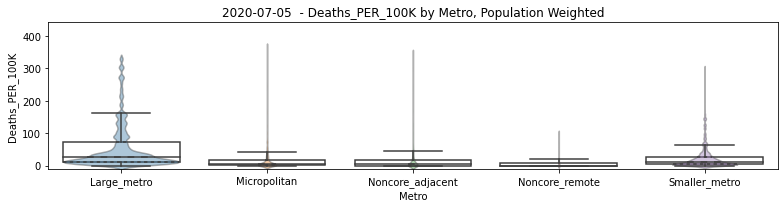

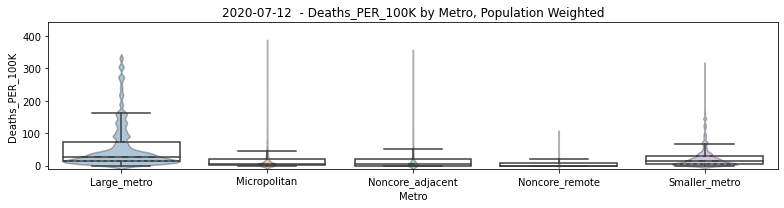

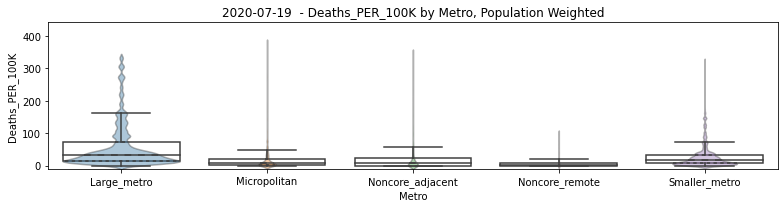

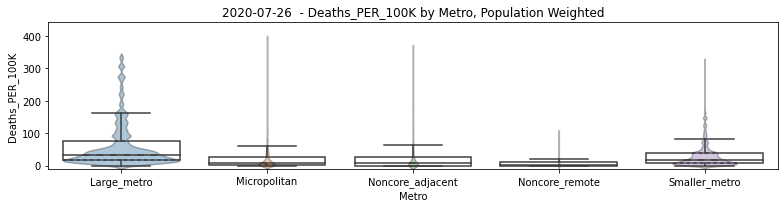

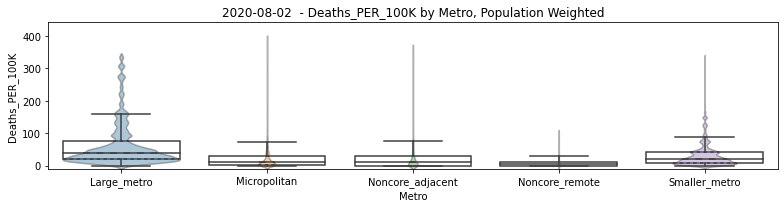

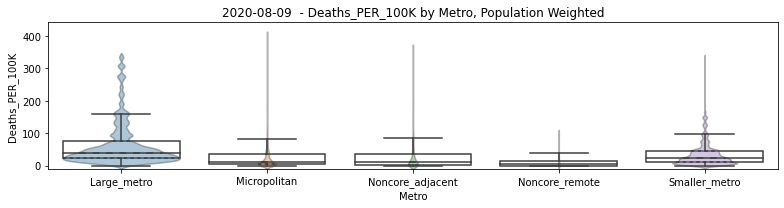

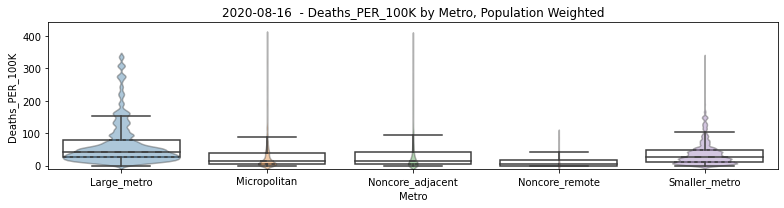

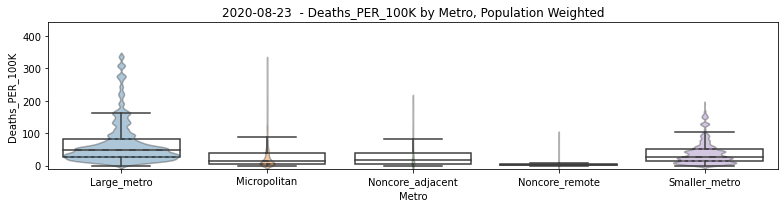

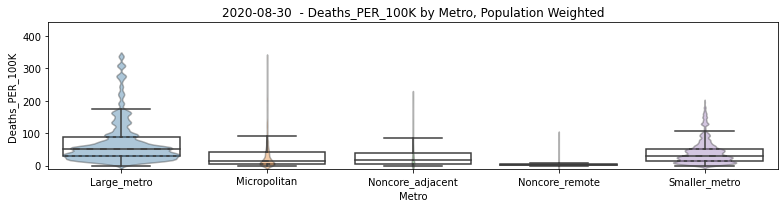

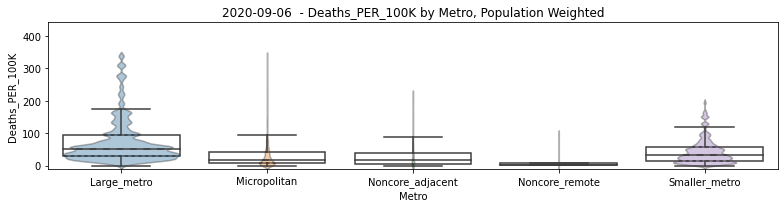

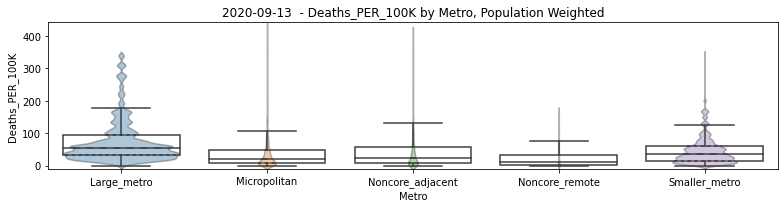

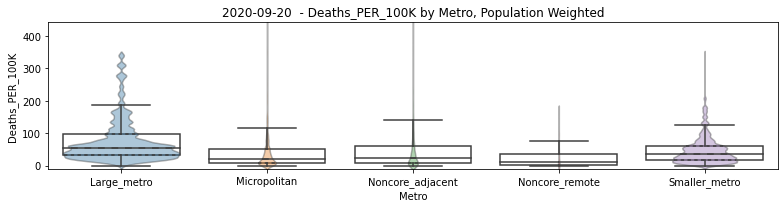

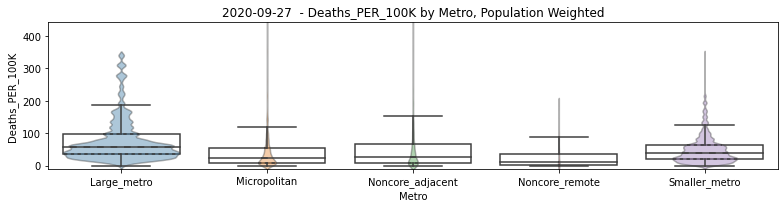

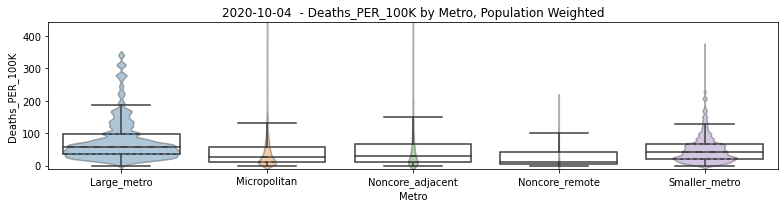

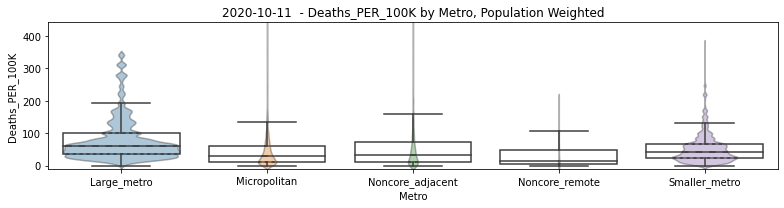

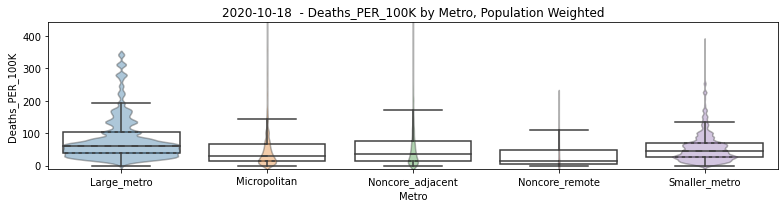

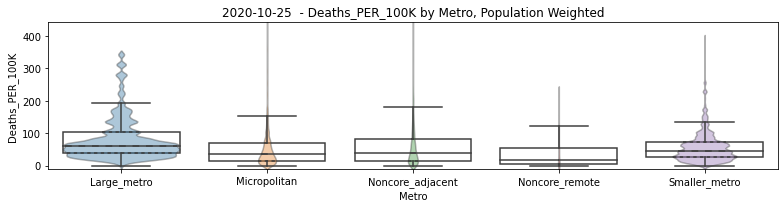

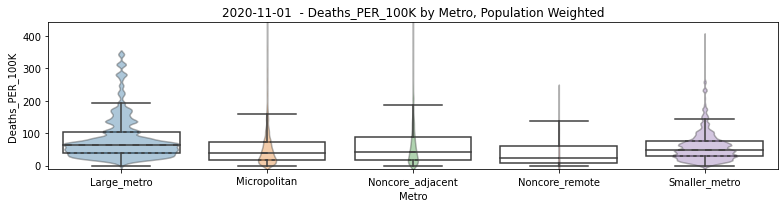

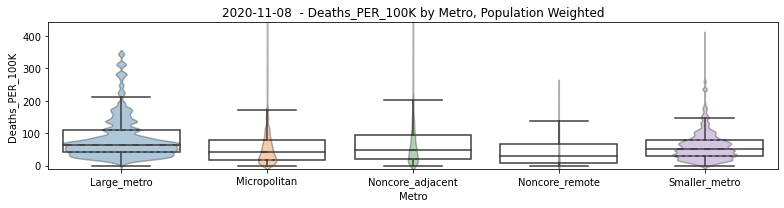

In [1142]:
loop_for_gif_by_metro("Deaths_PER_100K")

In [1143]:
all_combo_list = []
for i in Yvar_list:
    for x in grouplist:
        all_combo_list.append((i,x))

In [1144]:
all_combo_list[0]

('retail_and_recreation_PCT_CFB_RollingAvg', 'Metro')

In [ ]:
for i in all_combo_list:
    try:
        loop_for_gif_by_metro(Yvar=i[0], group=i[1])
    except:
        print("failure for {x}".format(x=str(i)))
        continue

  3%|▎         | 1/34 [00:01<00:39,  1.19s/it]

2020-03-22 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


  6%|▌         | 2/34 [00:02<00:39,  1.22s/it]

2020-03-29 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


  9%|▉         | 3/34 [00:03<00:38,  1.23s/it]

2020-04-05 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 12%|█▏        | 4/34 [00:05<00:37,  1.25s/it]

2020-04-12 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 15%|█▍        | 5/34 [00:06<00:36,  1.25s/it]

2020-04-19 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 18%|█▊        | 6/34 [00:07<00:34,  1.24s/it]

2020-04-26 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 21%|██        | 7/34 [00:08<00:33,  1.23s/it]

2020-05-03 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 24%|██▎       | 8/34 [00:09<00:31,  1.23s/it]

2020-05-10 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 26%|██▋       | 9/34 [00:11<00:30,  1.24s/it]

2020-05-17 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 29%|██▉       | 10/34 [00:12<00:30,  1.25s/it]

2020-05-24 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 32%|███▏      | 11/34 [00:13<00:29,  1.26s/it]

2020-05-31 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 35%|███▌      | 12/34 [00:15<00:30,  1.37s/it]

2020-06-07 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 38%|███▊      | 13/34 [00:16<00:27,  1.33s/it]

2020-06-14 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 41%|████      | 14/34 [00:17<00:25,  1.30s/it]

2020-06-21 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 44%|████▍     | 15/34 [00:19<00:24,  1.28s/it]

2020-06-28 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 47%|████▋     | 16/34 [00:21<00:29,  1.62s/it]

2020-07-05 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 50%|█████     | 17/34 [00:23<00:28,  1.69s/it]

2020-07-12 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 53%|█████▎    | 18/34 [00:25<00:27,  1.73s/it]

2020-07-19 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 56%|█████▌    | 19/34 [00:26<00:24,  1.64s/it]

2020-07-26 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 59%|█████▉    | 20/34 [00:27<00:21,  1.52s/it]

2020-08-02 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 62%|██████▏   | 21/34 [00:29<00:19,  1.47s/it]

2020-08-09 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 65%|██████▍   | 22/34 [00:30<00:16,  1.39s/it]

2020-08-16 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 68%|██████▊   | 23/34 [00:31<00:14,  1.30s/it]

2020-08-23 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 71%|███████   | 24/34 [00:32<00:12,  1.27s/it]

2020-08-30 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 74%|███████▎  | 25/34 [00:33<00:11,  1.23s/it]

2020-09-06 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 76%|███████▋  | 26/34 [00:35<00:09,  1.22s/it]

2020-09-13 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 79%|███████▉  | 27/34 [00:36<00:08,  1.23s/it]

2020-09-20 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 82%|████████▏ | 28/34 [00:37<00:07,  1.24s/it]

2020-09-27 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 85%|████████▌ | 29/34 [00:38<00:06,  1.24s/it]

2020-10-04 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 88%|████████▊ | 30/34 [00:40<00:05,  1.27s/it]

2020-10-11 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 91%|█████████ | 31/34 [00:41<00:03,  1.26s/it]

2020-10-18 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 94%|█████████▍| 32/34 [00:42<00:02,  1.25s/it]

2020-10-25 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


 97%|█████████▋| 33/34 [00:43<00:01,  1.29s/it]

2020-11-01 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro


100%|██████████| 34/34 [00:45<00:00,  1.33s/it]

2020-11-08 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Metro



  3%|▎         | 1/34 [00:01<00:38,  1.16s/it]

2020-03-22 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


  6%|▌         | 2/34 [00:02<00:37,  1.17s/it]

2020-03-29 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


  9%|▉         | 3/34 [00:03<00:36,  1.18s/it]

2020-04-05 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


 12%|█▏        | 4/34 [00:04<00:35,  1.18s/it]

2020-04-12 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


 15%|█▍        | 5/34 [00:05<00:34,  1.18s/it]

2020-04-19 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


 18%|█▊        | 6/34 [00:07<00:33,  1.19s/it]

2020-04-26 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


 21%|██        | 7/34 [00:08<00:32,  1.19s/it]

2020-05-03 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


 24%|██▎       | 8/34 [00:09<00:31,  1.20s/it]

2020-05-10 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


 26%|██▋       | 9/34 [00:10<00:30,  1.22s/it]

2020-05-17 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


 29%|██▉       | 10/34 [00:12<00:29,  1.22s/it]

2020-05-24 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


 32%|███▏      | 11/34 [00:13<00:28,  1.23s/it]

2020-05-31 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


 35%|███▌      | 12/34 [00:14<00:26,  1.22s/it]

2020-06-07 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


 38%|███▊      | 13/34 [00:15<00:25,  1.23s/it]

2020-06-14 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


 41%|████      | 14/34 [00:16<00:24,  1.22s/it]

2020-06-21 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


 44%|████▍     | 15/34 [00:18<00:23,  1.22s/it]

2020-06-28 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


 47%|████▋     | 16/34 [00:19<00:22,  1.22s/it]

2020-07-05 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


 50%|█████     | 17/34 [00:20<00:20,  1.21s/it]

2020-07-12 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


 53%|█████▎    | 18/34 [00:21<00:19,  1.20s/it]

2020-07-19 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region


 56%|█████▌    | 19/34 [00:22<00:17,  1.18s/it]

2020-07-26 .png has been created in retail_and_recreation_PCT_CFB_RollingAvg_by_Region
